In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications import InceptionResNetV2
from keras.models import Model
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
dtr,dval,dte = pickle.load(open('gender_data.pkl','rb'))

In [3]:
print(len(dtr),len(dval),len(dte))

6000 2000 2000


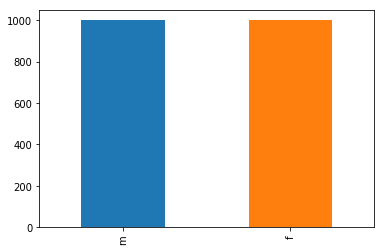

In [5]:
dte['gender'].value_counts().plot.bar()

In [6]:
model = InceptionResNetV2()

In [7]:
model.layers.pop()
model = Model(model.inputs,model.layers[-1].output)

In [9]:
len(dtr)

6000

In [10]:
X,Y = [],[]
cnt = 0
for i,r in dtr.iterrows():
    path = 'aligned/' + r['path']
    img = image.load_img(path, target_size=(299,299))
    img = image.img_to_array(img)
    img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    img = preprocess_input(img)
    X.append(model.predict(img)[0])
    if i % 500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500


In [11]:
x = np.array(X)

In [12]:
x.shape

(6000, 1536)

In [13]:
y = dtr['gender'] == 'm'
y = y.astype(int)

In [14]:
y.shape

(6000,)

In [15]:
pickle.dump([x,y],open('tri2.pkl','wb'))

In [16]:
del x,y

In [17]:
len(dval)

2000

In [18]:
X,Y = [],[]
cnt = 0
for i,r in dval.iterrows():
    path = 'aligned/' + r['path'] 
    img = image.load_img(path, target_size=(299,299))
    img = image.img_to_array(img)
    img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    img = preprocess_input(img)
    X.append(model.predict(img)[0])
    if i % 500 == 0:
        print(i)

0
500
1000
1500


In [19]:
y = dval['gender'] == 'm'
y = y.astype(int)

In [20]:
y.shape

(2000,)

In [21]:
x = np.array(X)

In [22]:
x.shape

(2000, 1536)

In [23]:
pickle.dump([x,y],open('vali2.pkl','wb'))

In [8]:
len(dte)

2000

In [9]:
X,Y = [],[]
cnt = 0
for i,r in dte.iterrows():
    path = 'aligned/' + r['path'] 
    img = image.load_img(path, target_size=(299,299))
    img = image.img_to_array(img)
    img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    img = preprocess_input(img)
    X.append(model.predict(img)[0])
    if i % 500 == 0:
        print(i)

0
500
1000
1500


In [10]:
y = dte['gender'] == 'm'
y = y.astype(int)

In [11]:
y.shape

(2000,)

In [12]:
x = np.array(X)

In [13]:
x.shape

(2000, 1536)

In [14]:
pickle.dump([x,y],open('tei2.pkl','wb'))